In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Downloads/telco_churn.csv')
pd.set_option('Display.max_columns',200)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Routine structure check

In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Mean Monthly charges is about 64.76 units and 75% of observations are monthly charged around 89.85.
The maximum tenure is 72 months with mean being about 32 months.
About 50% of customers stayed for 55 months tenure and were charged 70.3 per month.
To get more relevant information, we will visualize attributes of the data and distribution of target variable(Churn)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] , errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [13]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


The correlation matrix above for the numeric features indicates a high correlation of 0.82 and 0.65 between (TotalCharges,tenure) and (TotalCharges, MonthlyCharges) respectively. This indicates a possible problem of multicollinearity.

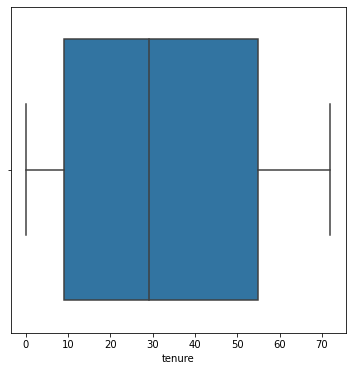

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x='tenure', data=df)

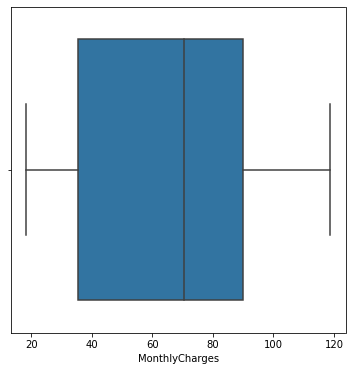

In [15]:
plt.figure(figsize=(6,6))
sns.boxplot(x='MonthlyCharges', data=df)

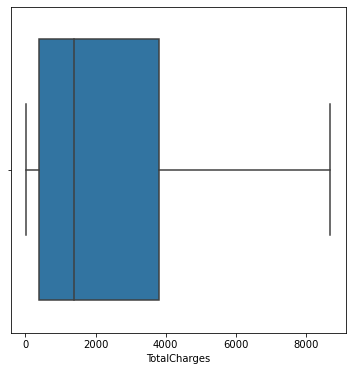

In [16]:
plt.figure(figsize=(6,6))
sns.boxplot(x='TotalCharges', data=df)

So we see that there are no Outliers in the continous variables Tenure,Monthly charges,Total Charges.

In [17]:
#Dividing the Dataframe into two parts churn and non-churn.
df_yes = df[df['Churn']=='Yes']
df_no = df[df['Churn']=='No']

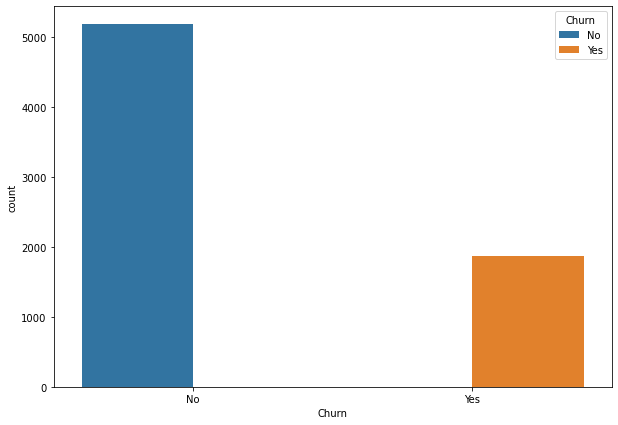

In [18]:
plt.figure(figsize=(10,7))
sns.countplot(x='Churn',data=df, hue='Churn')

So we see that the customer those who have not churned are above 5000 and customer those who have churned are approx 2000.

In [19]:
#Customer who churned
df_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


In [20]:
##Customer who did not churn
df_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


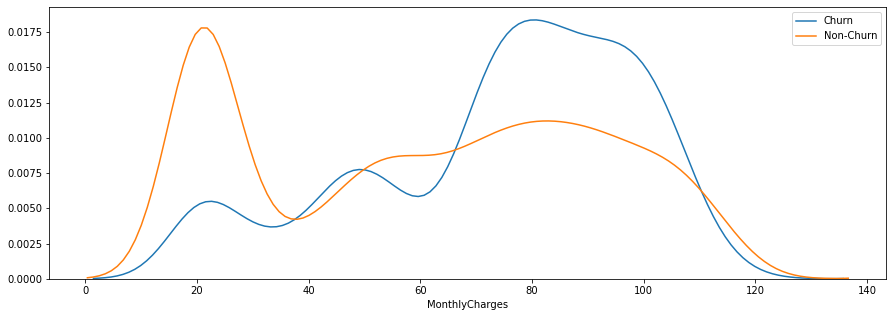

In [21]:
plt.figure(figsize = (15, 5))
sns.distplot(df_yes['MonthlyCharges'], hist=False, label='Churn')
sns.distplot(df_no['MonthlyCharges'], hist=False, label='Non-Churn')

There is peak at 60-120 monthly charges those who belong to churn.
There are more number of people in the range who pay 0-40 and 60-120 who belong to non churn category.

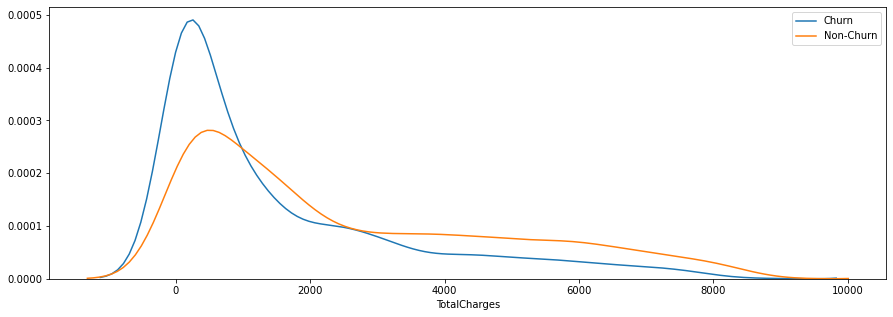

In [22]:
plt.figure(figsize = (15, 5))
sns.distplot(df_yes['TotalCharges'], hist=False, label='Churn')
sns.distplot(df_no['TotalCharges'], hist=False, label='Non-Churn')

People with total charges 500 and 2500 and between 4000 to 8000 tend to churn less.
Customer who pay between 0-2000 churn more

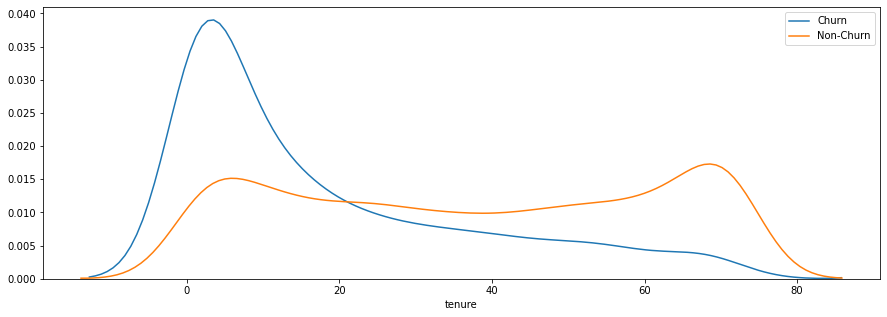

In [23]:
plt.figure(figsize = (15, 5))
sns.distplot(df_yes['tenure'], hist=False, label='Churn')
sns.distplot(df_no['tenure'], hist=False, label='Non-Churn')

Customer with tenure between 0 to 20 months churn more.
Customer with churning longer tenure have lower churning rate. 

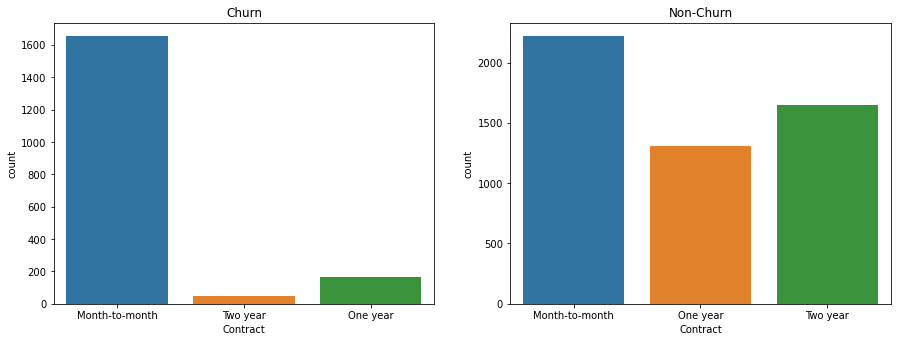

In [24]:
plt.figure(figsize=(15,30))
plt.subplot(5,2,1)
plt.title("Churn")
sns.countplot('Contract', data=df_yes)
plt.subplot(5,2,2)
plt.title("Non-Churn")
sns.countplot('Contract', data=df_no)

There is a slight increase in month to month plan in non churn category but we see major increase in Two year contract and one year contract in Non churn than in churning category.

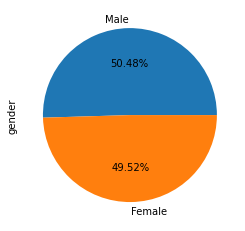

In [25]:
df['gender'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')

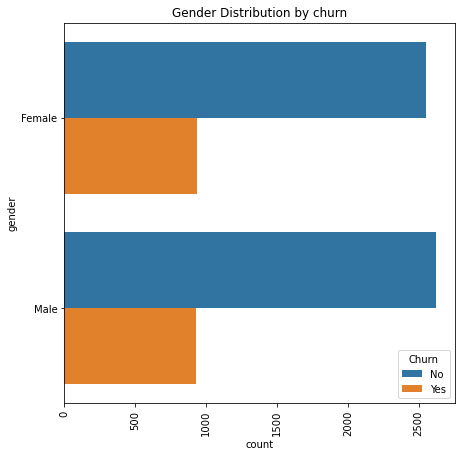

In [26]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Gender Distribution by churn")
sns.countplot(data = df, y='gender',hue = 'Churn',orient='v')

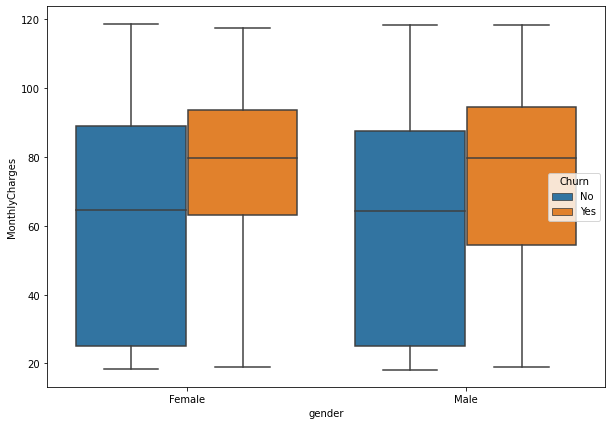

In [27]:
plt.figure(figsize=(10,7))
sns.boxplot(x="gender", y="MonthlyCharges", data=df, hue='Churn')

#### Gender Conclusion: Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn


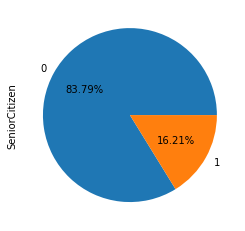

In [28]:
df['SeniorCitizen'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%')

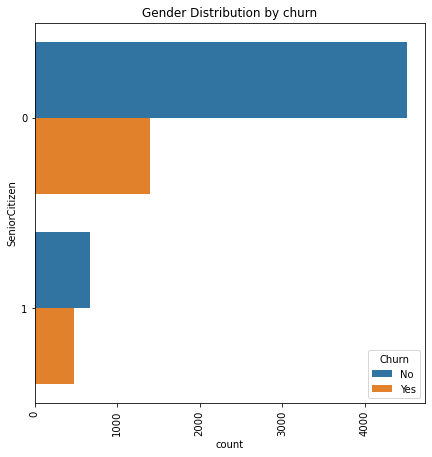

In [29]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Gender Distribution by churn")
ax = sns.countplot(data = df, y='SeniorCitizen', 
                order=df['SeniorCitizen'].value_counts().index,hue = 'Churn')

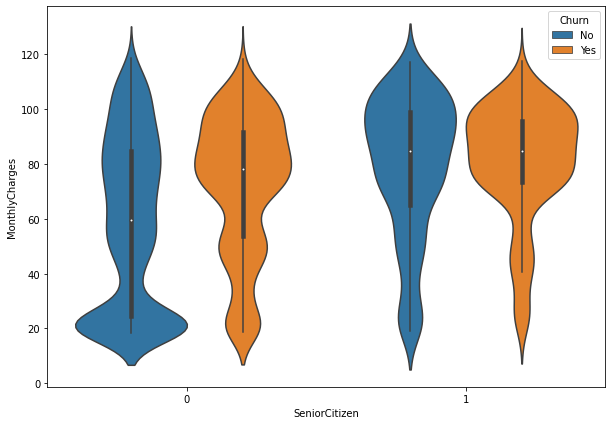

In [30]:
plt.figure(figsize=(10,7))
sns.violinplot(x="SeniorCitizen", y="MonthlyCharges", data=df, hue='Churn')

Age Conclusion:

    Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
    Overall, more non-senior citizens churn than senior citizens
    A higher proportion of senior citizens churn than non-senior citizen

### Partner and Dependents

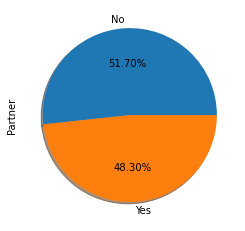

In [31]:
df['Partner'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',shadow=True)

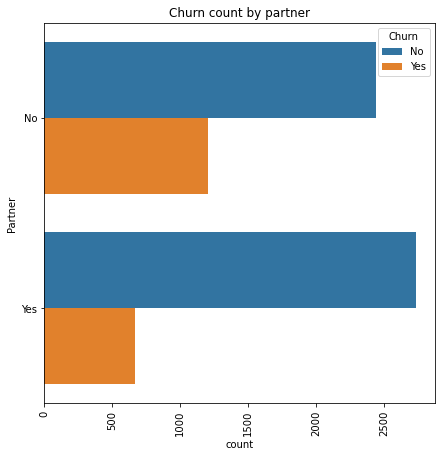

In [32]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn count by partner")
ax = sns.countplot(data = df, y='Partner', 
                order=df['Partner'].value_counts().index,hue = 'Churn')

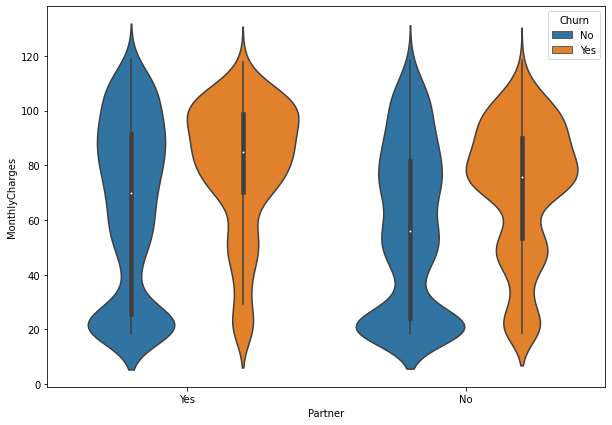

In [33]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Partner", y="MonthlyCharges", data=df, hue='Churn')

Partner Conclusions:
Overall, those without partners are more likely to churn than those with partners

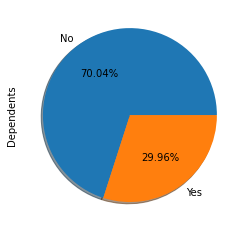

In [34]:
df['Dependents'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',shadow=True)

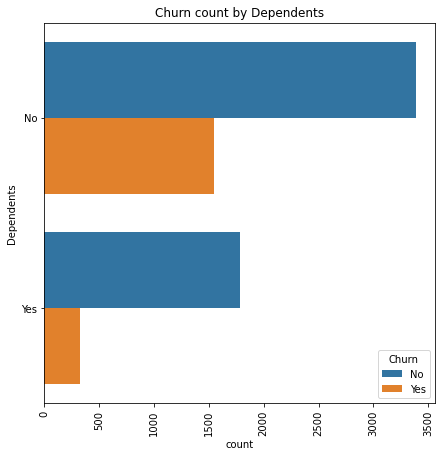

In [35]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn count by Dependents")
ax = sns.countplot(data = df, y='Dependents', 
                order=df['Dependents'].value_counts().index,hue = 'Churn')

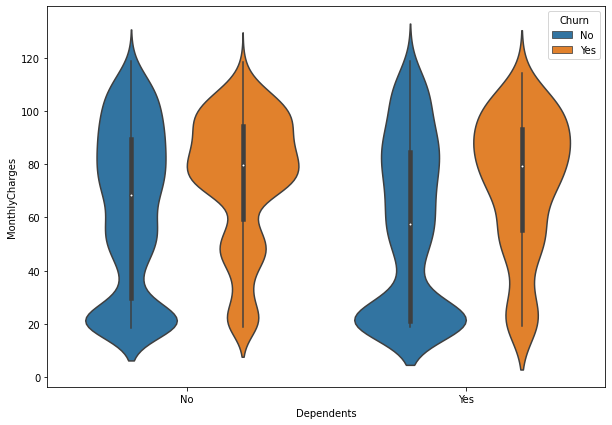

In [36]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Dependents", y="MonthlyCharges", data=df, hue='Churn')

Customers without dependents are more likely to churn than those with dependents

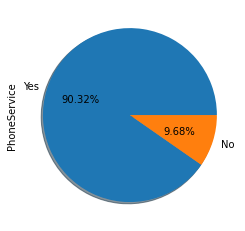

In [37]:
df['PhoneService'].value_counts(normalize=True).plot.pie(autopct='%1.2f%%',shadow=True)

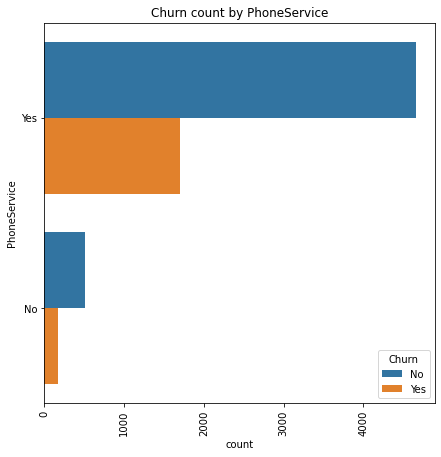

In [38]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn count by PhoneService")
ax = sns.countplot(data = df, y='PhoneService', 
                order=df['PhoneService'].value_counts().index,hue = 'Churn')

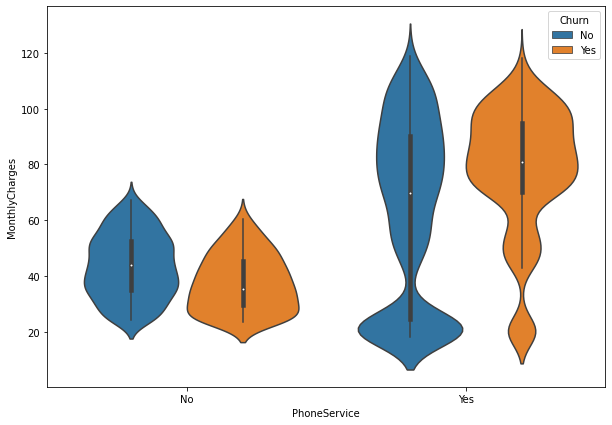

In [39]:
plt.figure(figsize=(10,7))
sns.violinplot(x="PhoneService", y="MonthlyCharges", data=df, hue='Churn')

In [40]:
df['MultipleLines'] = df['MultipleLines'].replace('Yes','Multiple')
df['MultipleLines'] = df['MultipleLines'].replace('No','Singule')

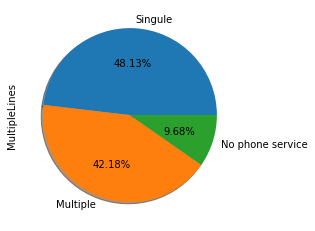

In [41]:
df['MultipleLines'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

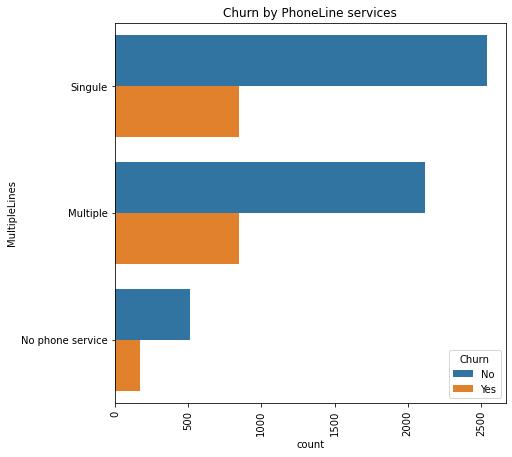

In [42]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Churn by PhoneLine services")
ax = sns.countplot(data = df, y='MultipleLines', 
                order=df['MultipleLines'].value_counts().index,hue = 'Churn')

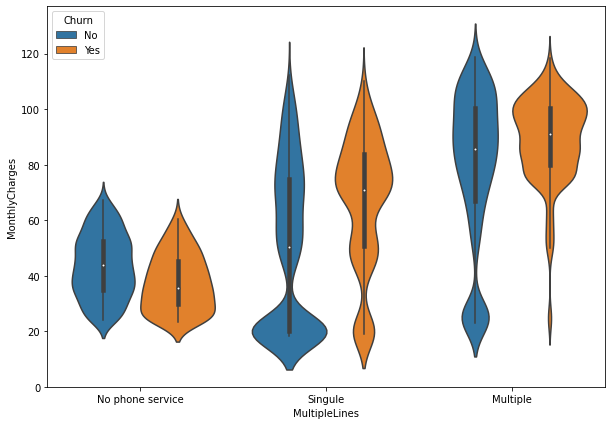

In [43]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MultipleLines", y="MonthlyCharges", data=df, hue='Churn')

Phone Service Conclusions:

    Significantly more customers with only phone service will not churn than those other customers.
    People with only phone service churn ~25% of the time.
    Customers with phone services only pay a higher average monthly charge.
    Customers with multiple lines churn at approximately the same rate as those with a singular line.
    Customers with multiple lines more frequently pay a higher monthly charge than those with singular phone    lines.

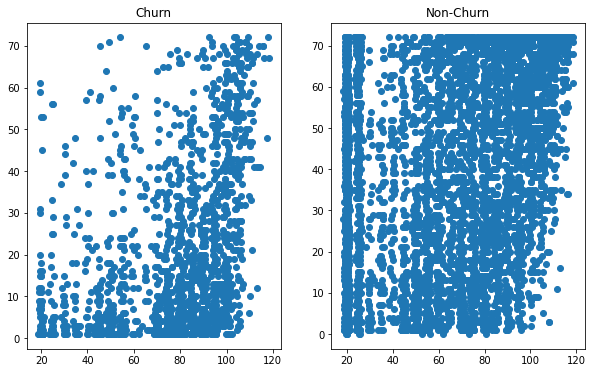

In [44]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Churn')
plt.scatter(df_yes['MonthlyCharges'],df_yes['tenure'])
plt.subplot(1,2,2)
plt.title('Non-Churn')
plt.scatter(df_no['MonthlyCharges'],df_no['tenure'])

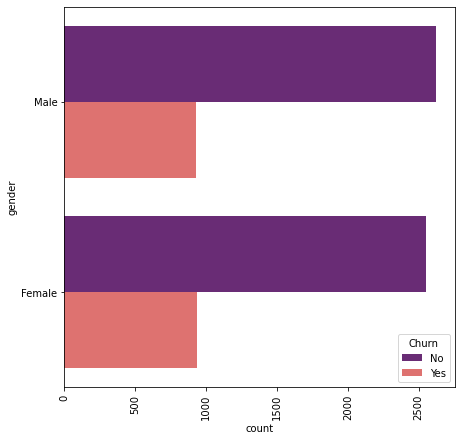

In [45]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
ax = sns.countplot(data = df, y='gender', 
                   order=df['gender'].value_counts().index,hue = 'Churn',palette='magma')

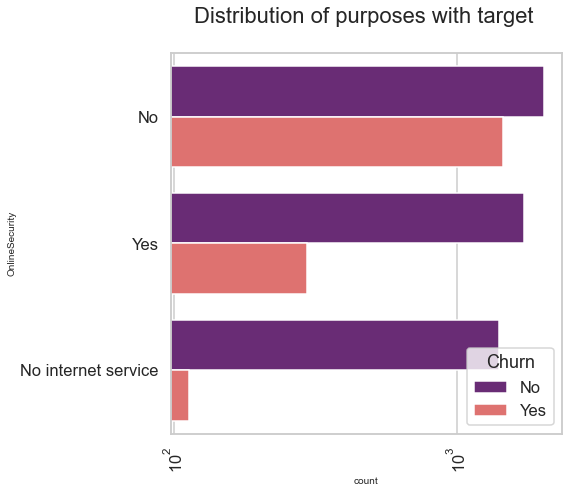

In [46]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(7,7))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = df, y= 'OnlineSecurity', 
                   order=df['OnlineSecurity'].value_counts().index,hue = 'Churn',palette='magma')

There is no relation between Monthly charges and tenure.

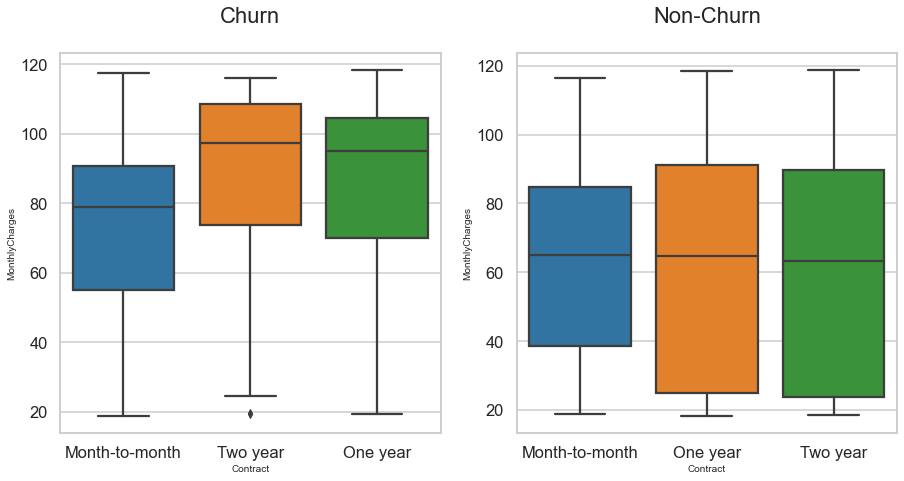

In [47]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title('Churn')
sns.boxplot(x='Contract',y='MonthlyCharges',data=df_yes)
plt.subplot(1,2,2)
plt.title('Non-Churn')
sns.boxplot(x='Contract',y='MonthlyCharges', data=df_no)

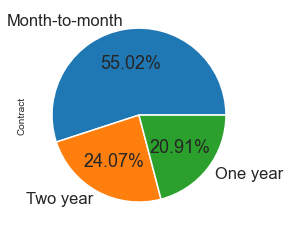

In [48]:
df['Contract'].value_counts().plot.pie(autopct='%1.2f%%')

## Contract Conclusion:

    More than half of customers use a monthly payment option.
    
    Significantly more customers churn on monthly plans.
    
    The longer the plan, the lower the churn rate.
    Monthly charges are generally higher the longer the contract is

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

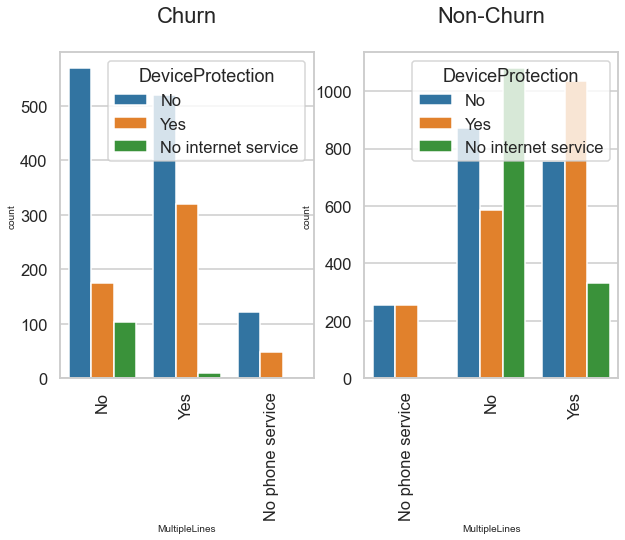

In [49]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('Churn')
sns.countplot(x='MultipleLines',hue='DeviceProtection',data=df_yes)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Churn')
sns.countplot(x='MultipleLines',hue='DeviceProtection', data=df_no)
plt.xticks(rotation=90)

Customer with no multiple lines and no internet are almost double in non churn category.

The number of customers in Non-churn category is high, with device protection but no internet services.

People with device protection is high in Non-churn category.

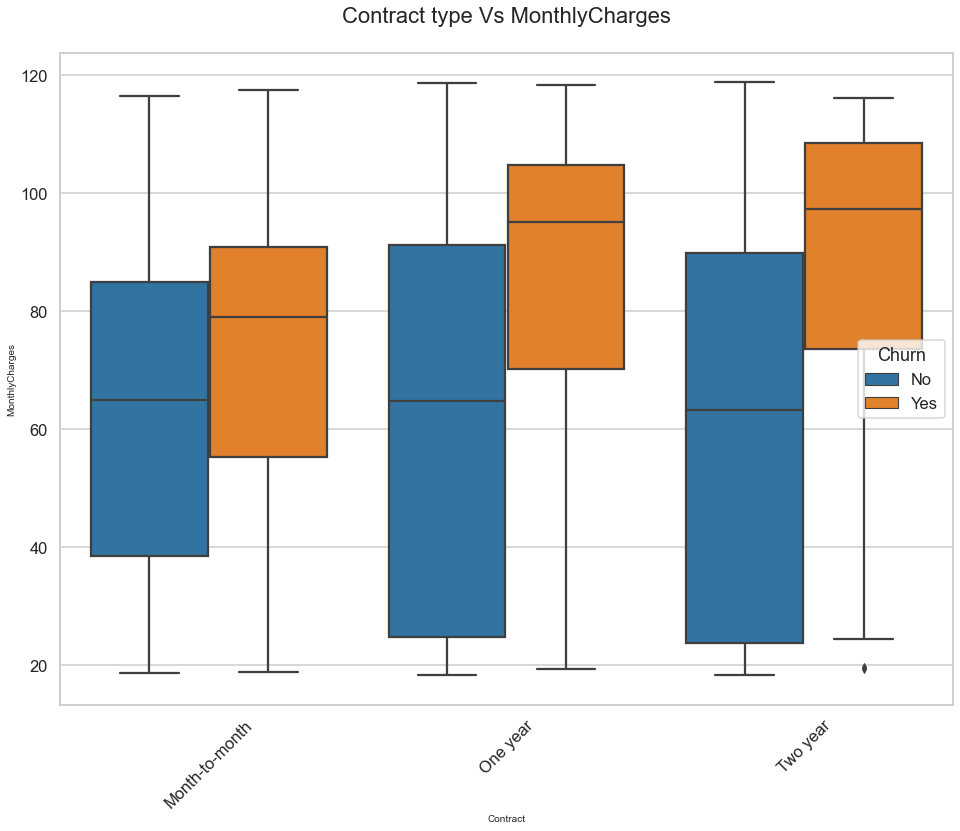

In [50]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='Contract',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('Contract type Vs MonthlyCharges')
plt.show()

People who belong to two year contract and pay more monthly charges churn more

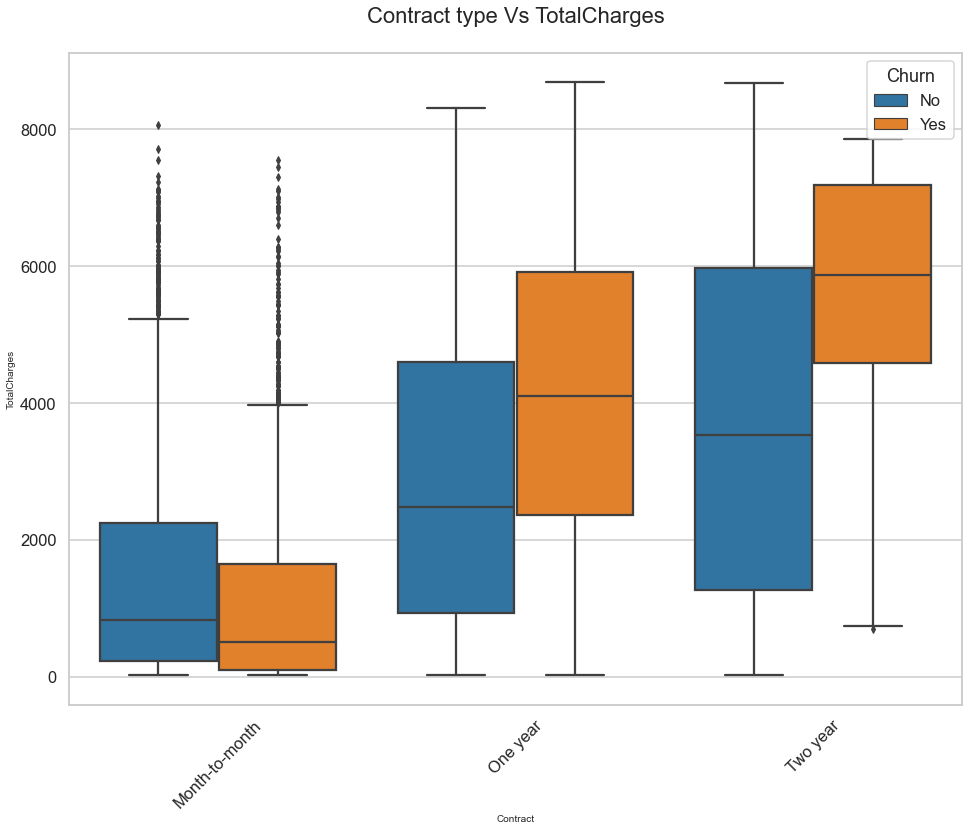

In [51]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='Contract',y='TotalCharges', hue ='Churn',orient='v')
plt.title('Contract type Vs TotalCharges')
plt.show()

People with OnlineSecurity and No internet services tend to churn less

## PaperLess Billing & Payment Menthods

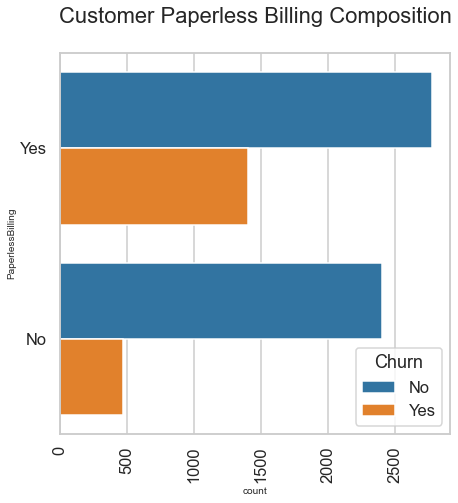

In [52]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Customer Paperless Billing Composition")
ax = sns.countplot(data = df, y='PaperlessBilling', 
                order=df['PaperlessBilling'].value_counts().index,hue = 'Churn')

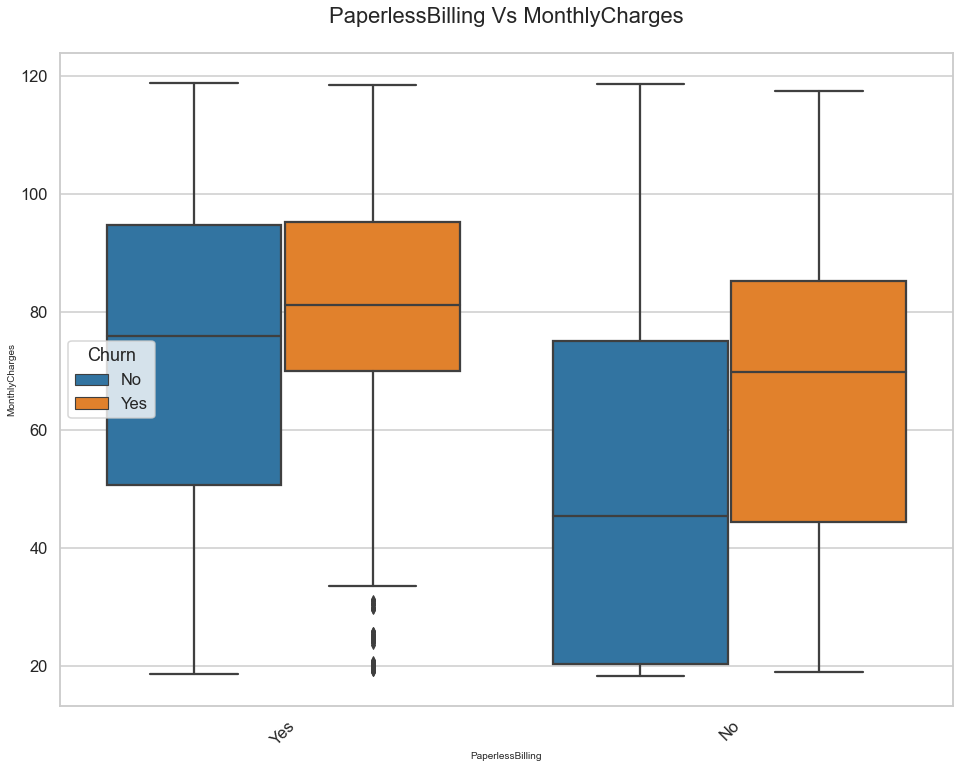

In [53]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='PaperlessBilling',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('PaperlessBilling Vs MonthlyCharges')
plt.show()

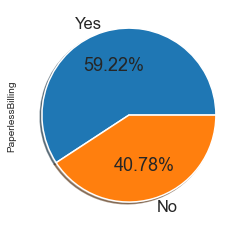

In [54]:
df['PaperlessBilling'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

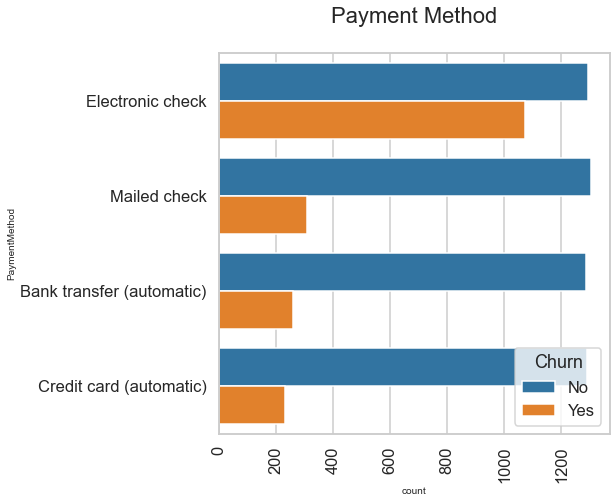

In [55]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("Payment Method")
ax = sns.countplot(data = df, y='PaymentMethod', 
                order=df['PaymentMethod'].value_counts().index,hue = 'Churn')

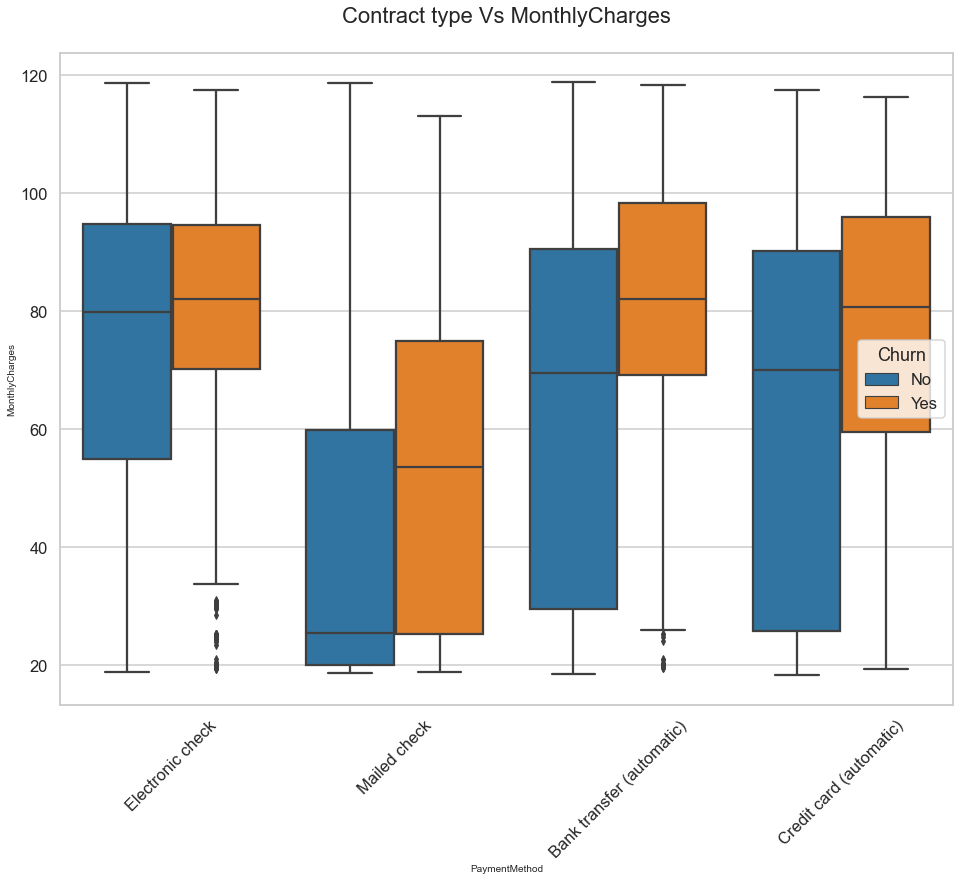

In [56]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='PaymentMethod',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('Contract type Vs MonthlyCharges')
plt.show()

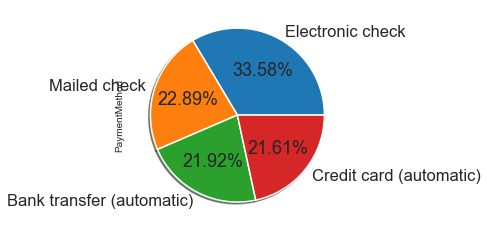

In [57]:
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

Payments Conclusions:
Customers with non-paperless billing churn almost 15% more than paperless customers.

Paperless customers churn at similar rates as non-paperless customers when the monthly price is below 60 dollars, once above 60 more paperless customers churn than non-paperless

Customers who pay with e-check churn more than 10% than customers with all other payment methods

Customers who pay by credit card have consistent churn rates regardless of monthly charge, whereas customers paying by bank transfer, e-chcek, or mailed check all see an up-tick in churn once monthly charges rise above 60.

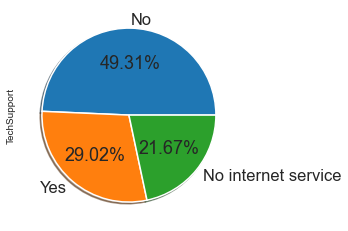

In [58]:
df['TechSupport'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True)

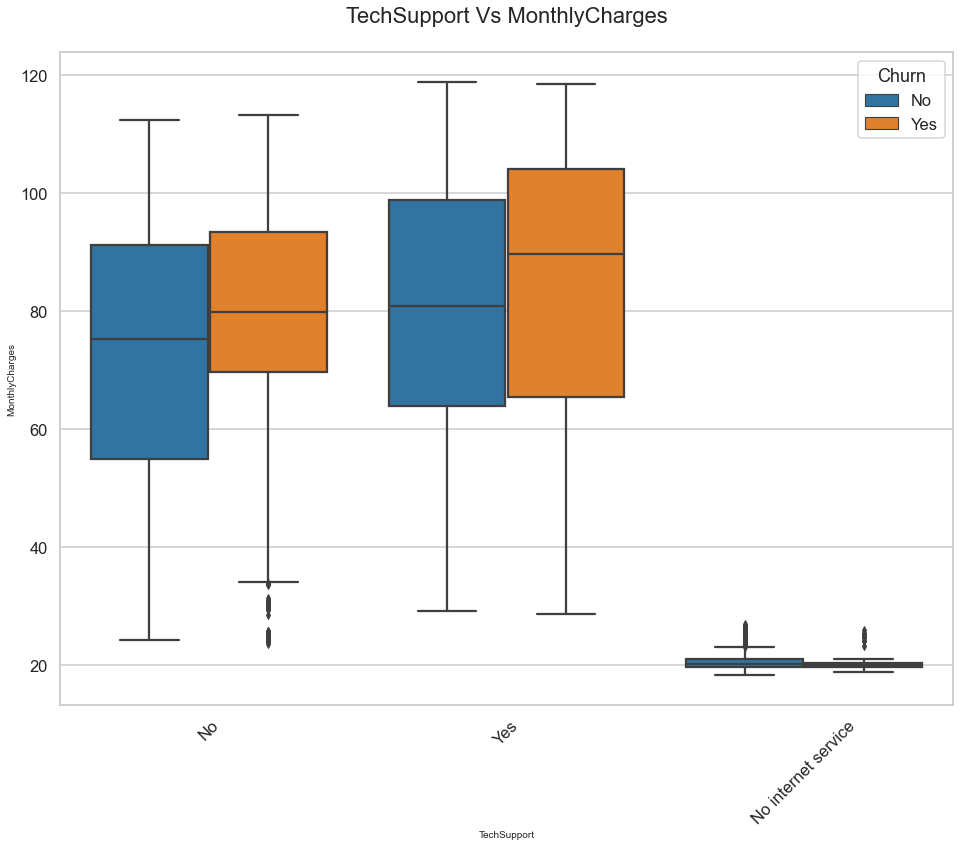

In [59]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df, x='TechSupport',y='MonthlyCharges', hue ='Churn',orient='v')
plt.title('TechSupport Vs MonthlyCharges')
plt.show()

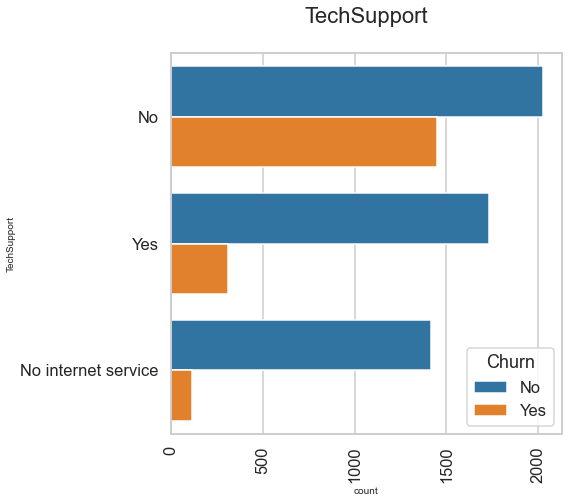

In [60]:
plt.figure(figsize=(7,7))
plt.xticks(rotation=90)
plt.title("TechSupport")
ax = sns.countplot(data = df, y='TechSupport', 
                order=df['TechSupport'].value_counts().index,hue = 'Churn')

Almost 30 % of customer opted for tech support.

People opting for tech support have less churning rate than the ones who have not opted for tech support.

People with tech Support pay 10 to 12 dollars more than people with no support

In [61]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,Singule,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,Singule,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,Singule,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [63]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Contract', 'PaymentMethod', 'gender', 'InternetService']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [64]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,Male,0,0,0,34,1,Singule,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,Male,0,0,0,2,1,Singule,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0
4,9237-HQITU,Female,0,0,0,2,1,Singule,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0


In [65]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(df['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
df = pd.concat([df,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(df['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(df['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(df['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(df['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(df['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(df['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
df = pd.concat([df,sm1], axis=1)

In [66]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Multiple,MultipleLines_Singule,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,0,0,34,1,Singule,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,Male,0,0,0,2,1,Singule,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,Female,0,0,0,2,1,Singule,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [67]:
df = df.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], 1)

In [68]:
#The varaible was imported as a string we need to convert it to float
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [70]:
# Checking for outliers in the continuous variables
num_telecom = df[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]

In [71]:
 #Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


In [72]:
df.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_Multiple                    0
MultipleLines_Singule                     0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [73]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

customerID                               0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_Multiple                   0.00
MultipleLines_Singule                    0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [74]:
# Removing NaN TotalCharges rows
df = df[~np.isnan(df['TotalCharges'])]

In [75]:
# Checking percentage of missing values after removing the missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_Multiple                   0.0
MultipleLines_Singule                    0.0
OnlineSecurity_No                        0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Putting feature variable to X
X = df.drop(['Churn','customerID'], axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Multiple,MultipleLines_Singule,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,0,1,0,1,0,1,29.85,29.85,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0
2,0,0,0,2,1,1,53.85,108.15,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0
3,0,0,0,45,0,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,0,0,0,2,1,1,70.70,151.65,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0


In [78]:
# Putting response variable to y
y = df['Churn']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
scaler = StandardScaler()

X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

X_train.head()

<ipython-input-81-b2fb7f361c54>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_Multiple,MultipleLines_Singule,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
879,0,0,0,0.019693,1,1,-0.338074,-0.276449,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0
5790,0,1,1,0.305384,0,1,-0.464443,-0.112702,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1
6498,0,0,0,-1.286319,1,1,0.581425,-0.974430,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0
880,0,0,0,-0.919003,1,1,1.505913,-0.550676,0,0,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
2784,0,0,1,-1.163880,1,1,1.106854,-0.835971,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1


In [82]:
### Checking the Churn Rate
churn = (sum(df['Churn'])/len(df['Churn'].index))*100
churn

26.578498293515356

In [83]:
#Checking imbalance in the data
round(len(df_no)/len(df_yes),2)

2.77

In [84]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

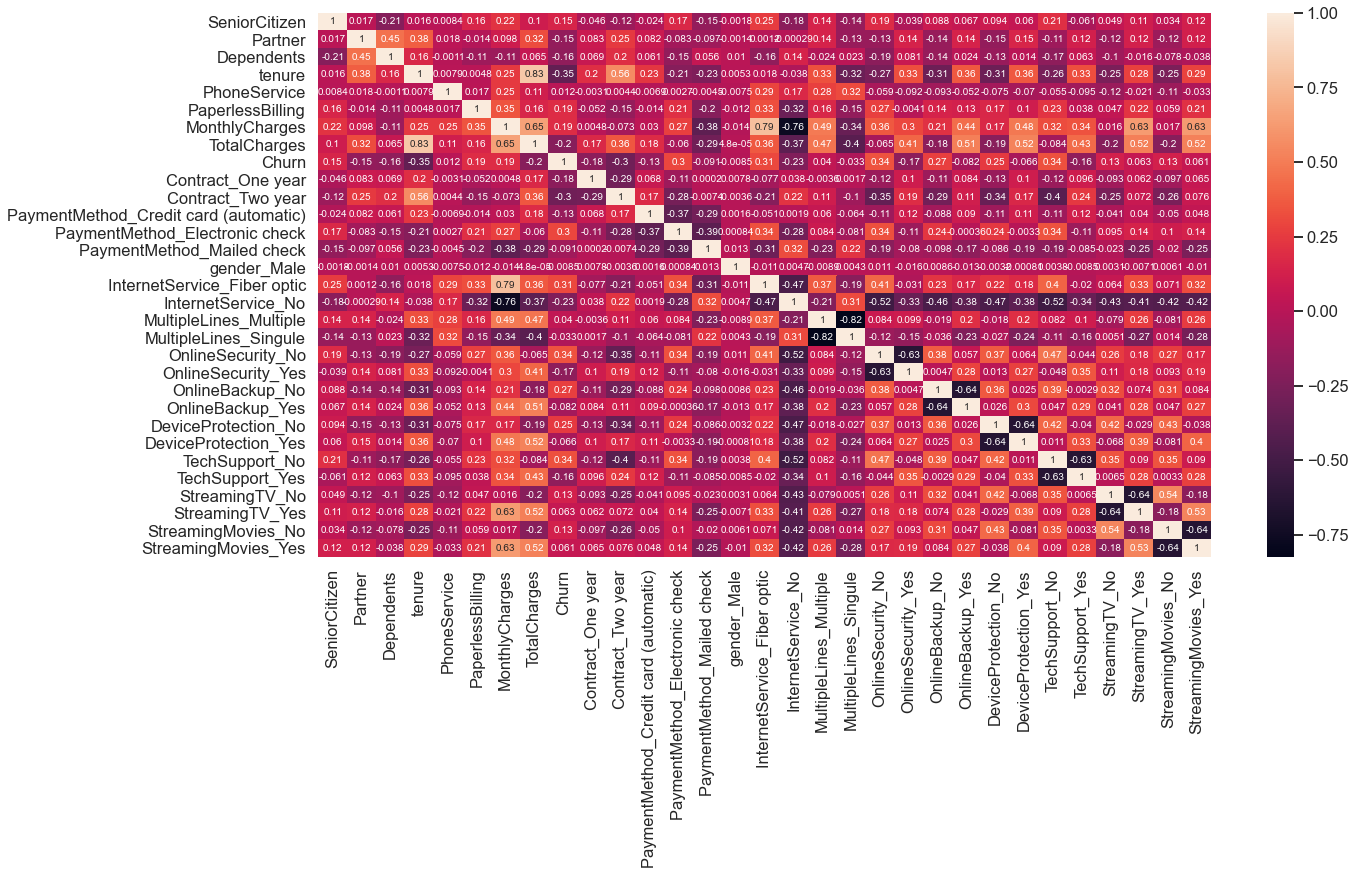

In [85]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show()

In [86]:
X_test = X_test.drop(['OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'], axis=1)
X_train = X_train.drop(['OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                         'StreamingTV_No','StreamingMovies_No'], axis=1)

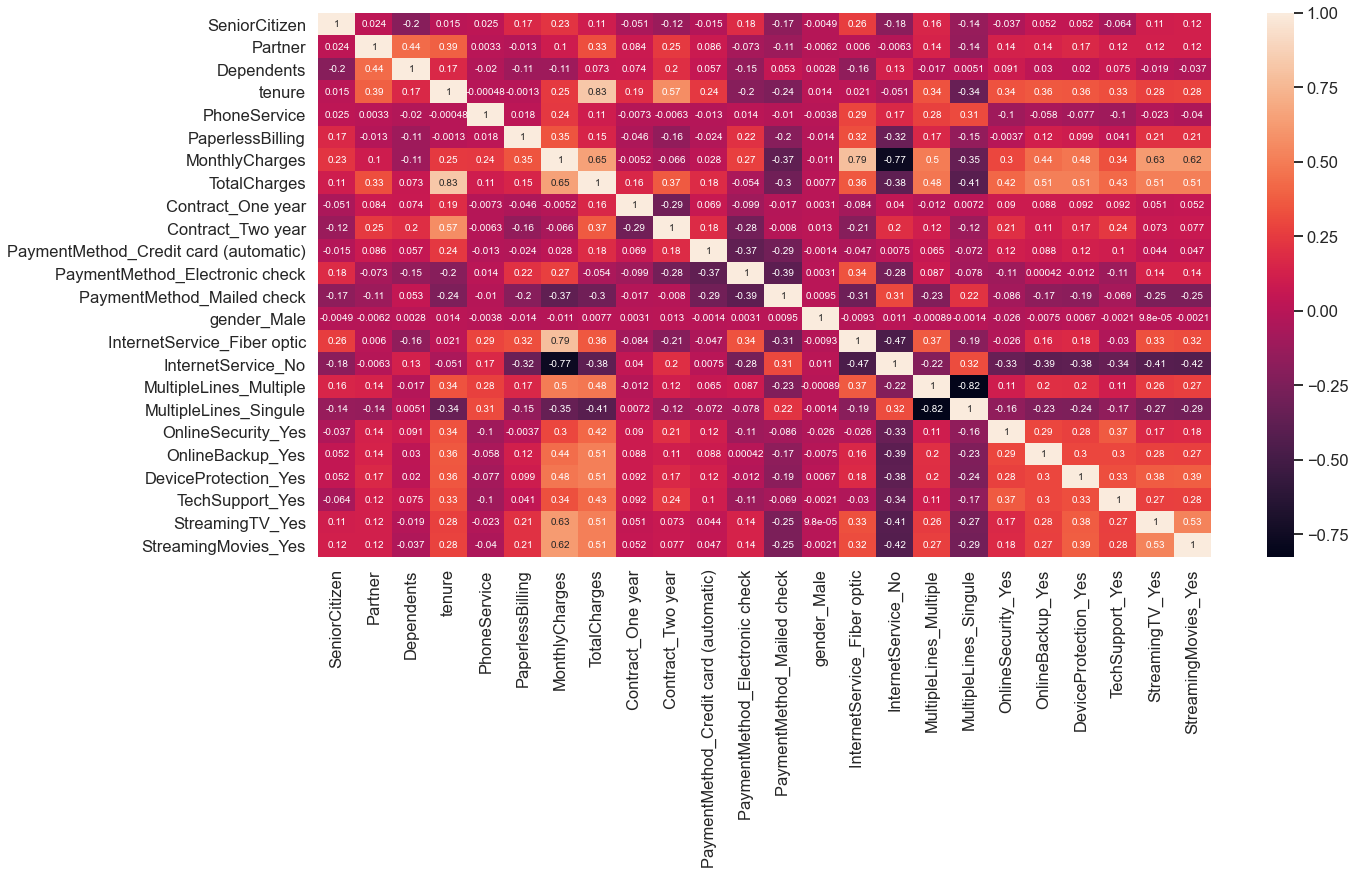

In [87]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [88]:
import statsmodels.api as sm

In [89]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Fri, 26 Mar 2021   Deviance:                       4009.4
Time:                        18:23:02   Pearson chi2:                 6.07e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9381      1.547     -2.546      0.011      -6.970      -0.906
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.331      0.183      -0.354       0.068
tenure                                   -1.5171      0.190     -8.003      0.000      -1.889      -1.146
PhoneService                              0.8212      0.589      1.395      0.163      -0.332       1.975
PaperlessBilling                          0.3254      0.090      3.612      0.000       0.149       0.502
MonthlyCharges                           -2.1805      1.160     -1.879      0.060      -4.455       0.093
TotalCharges                              0.7332      0.198      3.700      0.000       0.345       1.122
Contract_One year                        -0.6578      0.129     -5.099      0.000      -0.911      -0.405
Contract_Two year                        -1.2455      0.212     -5.868      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.881      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.433      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.138     -1.843      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.598      0.009       0.617       4.408
InternetService_No                       -2.7792      0.982     -2.830      0.005      -4.704      -0.855
MultipleLines_Multiple                    0.6918      0.393      1.762      0.078      -0.078       1.461
MultipleLines_Singule                     0.1295      0.205      0.632      0.528      -0.272       0.531
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.449       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.500      0.133      -0.099       0.745
TechSupport_Yes                          -0.0305      0.217     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.422      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.142      0.032       0.072       1.625
=========================================================================================================
"""

In [90]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

NameError: name 'logreg' is not defined

In [ ]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

In [ ]:
(len(df_no)/len(df_yes))